In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i,sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [ ]:
# Model Defination
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'mse',
    metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_val = x_train[:10000]
partial_X_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print(x_train.shape, X_val.shape, y_val.shape, partial_X_train.shape, partial_y_train.shape)

(25000, 10000) (10000, 10000) (10000,) (15000, 10000) (15000,)


In [ ]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20
35/35 [==============================] - 5s 103ms/step - loss: 0.1924 - accuracy: 0.7767 - val_loss: 0.1265 - val_accuracy: 0.8652
Epoch 2/20
35/35 [==============================] - 2s 54ms/step - loss: 0.0931 - accuracy: 0.9012 - val_loss: 0.0896 - val_accuracy: 0.8859
Epoch 3/20
35/35 [==============================] - 2s 48ms/step - loss: 0.0614 - accuracy: 0.9333 - val_loss: 0.0820 - val_accuracy: 0.8928
Epoch 4/20
35/35 [==============================] - 4s 112ms/step - loss: 0.0461 - accuracy: 0.9510 - val_loss: 0.0809 - val_accuracy: 0.8905
Epoch 5/20
35/35 [==============================] - 2s 66ms/step - loss: 0.0362 - accuracy: 0.9641 - val_loss: 0.0833 - val_accuracy: 0.8879
Epoch 6/20
35/35 [==============================] - 2s 43ms/step - loss: 0.0289 - accuracy: 0.9733 - val_loss: 0.0842 - val_accuracy: 0.8860
Epoch 7/20
35/35 [==============================] - 2s 64ms/step - loss: 0.0221 - accuracy: 0.9806 - val_loss: 0.0874 - val_accuracy: 0.8828
Epoch 8/20


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

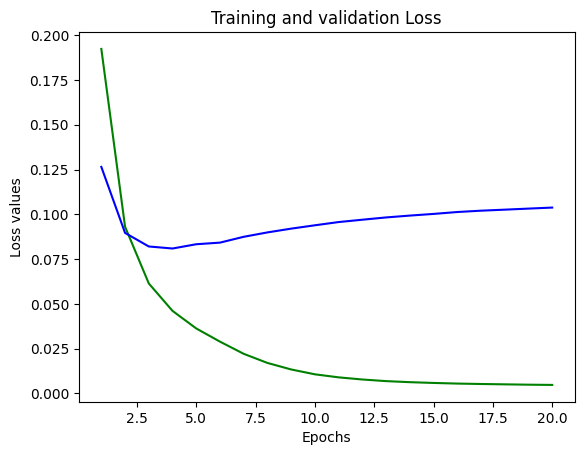

In [ ]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, loss_values,'g', label = "Training loss")
plt.plot(epochs, val_loss_values,'b', label = "Validation loss")

plt.title("Training and validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss values')

plt.show()

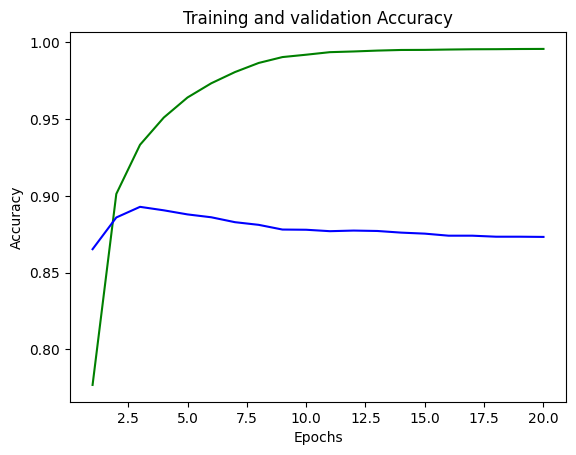

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs, acc_values,'g', label = "Training accuracy")
plt.plot(epochs, val_acc_values,'b', label = "Validation accuracy")

plt.title("Training and validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
result = model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


In [ ]:
print(result)

[[0.2642257 ]
 [0.9999948 ]
 [0.03376239]
 ...
 [0.19976708]
 [0.00673802]
 [0.07965798]]


In [ ]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i]=np.round(score)
    print(y_pred[i])

<ipython-input-25-518aeacfff63>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i]=np.round(score)


Streaming output truncated to the last 5000 lines.
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1

In [ ]:
mse_nn, mae_nn = model.evaluate(x_test, y_test)

print('Mean squared error on test data is: ', mse_nn)
print('Mean absolute error on test data is: ', mae_nn)

782/782 [==============================] - 5s 5ms/step - loss: 0.1157 - accuracy: 0.8602
Mean squared error on test data is:  0.11574842035770416
Mean absolute error on test data is:  0.8601599931716919
